In [1]:
import pyscreenshot as ImageGrab
import keras

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 30.0% of memory, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


### model

In [1]:
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from itertools import chain
from keras import backend as K
from keras.layers import Dense, Activation, Convolution2D, Convolution3D, MaxPooling2D, MaxPooling3D, BatchNormalization, Flatten, ZeroPadding2D, Dropout
from keras.models import load_model, Sequential
from keras.optimizers import Adam

NB_FRAMES = 5
INPUT_SHAPE = (NB_FRAMES, 91, 118)
# OUTPUT_SHAPE = (1, OUTPUT_ROW, OUTPUT_COL)
OBJECTIVE_FUNCTION = 'binary_crossentropy'
METRICS = ['binary_crossentropy', 'accuracy']

def center_normalize(x):
    """Custom activation for online sample-wise center and std. normalization."""
    return (x - K.mean(x)) / K.std(x)

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(Activation(activation=center_normalize, input_shape=INPUT_SHAPE))
    model.add(ZeroPadding2D((1,1), input_shape=INPUT_SHAPE))
    # model.add(ZeroPadding2D((1,1),input_shape=(2, INPUT_ROW, INPUT_COL)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, activation='softmax'))
    model.compile(optimizer=Adam(lr=1e-5), loss=OBJECTIVE_FUNCTION, metrics=METRICS)

    return model

model = VGG_16()
model.summary()

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 30.0% of memory, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
activation_1 (Activation)        (None, 5, 91, 118)    0           activation_input_1[0][0]         
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 5, 93, 120)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 91, 118)   2944        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 93, 120)   0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [2]:
from keras.optimizers import sgd
from keras.optimizers import RMSprop

def dummy_model():  
    model = Sequential()
    model.add(Convolution2D(16, nb_row=3, nb_col=3, activation='relu', input_shape=INPUT_SHAPE))
    model.add(Convolution2D(32, nb_row=3, nb_col=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(9))
    model.compile(RMSprop(), 'MSE')
    return model

model = dummy_model()

### get screenshot

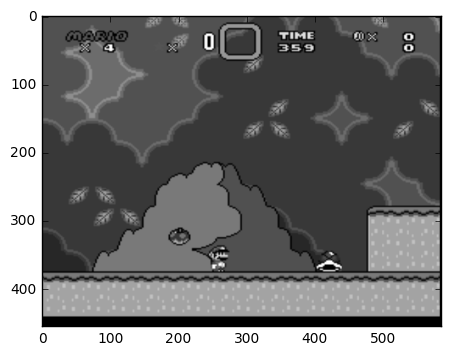

<type 'numpy.ndarray'>
(455, 585)
(84.583930789893884, 43.756218700654372, ModeResult(mode=array([ 56.407]), count=array([ 96507.])))


In [24]:
import numpy as np
import pyscreenshot as ImageGrab
from scipy import stats
im=ImageGrab.grab(bbox=(500,75,1085,530)) # X1,Y1,X2,Y2
# im.show()
# im.save("fim.png")
pix = np.array(im)
pix = rgb2gray(pix)
plt.figure()
plt.imshow(pix, cmap=plt.cm.gray)
plt.show()
print(type(pix))
print(pix.shape)
print(pix.mean(), pix.std(), stats.mstats.mode(pix.ravel()))

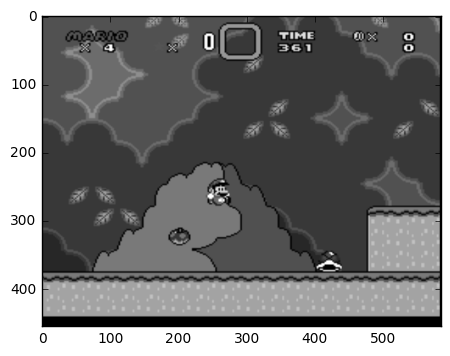

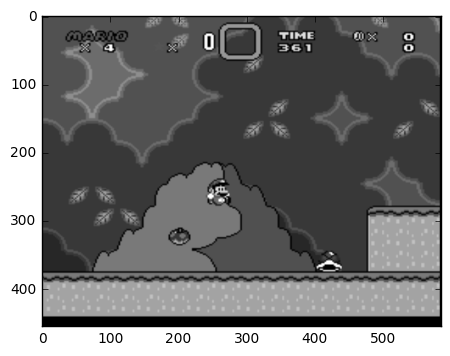

<type 'numpy.ndarray'>
(455, 585)
(84.474436494787255, 43.76023958462708)


In [22]:
import numpy as np
import pyscreenshot as ImageGrab
from matplotlib import pyplot as plt
im=ImageGrab.grab(bbox=(500,75,1085,530)) # X1,Y1,X2,Y2
# im.show()
# im.save("errou.png")
pix2 = np.array(im)
pix2 = rgb2gray(pix2)
plt.figure()
plt.imshow(pix2, cmap=plt.cm.gray)
plt.show()
print(type(pix2))
print(pix2.shape)
print(pix2.mean(), pix2.std())

In [26]:
abs((pix2 - pix).mean()), (pix2 - pix).std(),  stats.mstats.mode((pix2 - pix).ravel())

(0.10949429510659962,
 50.026935536518934,
 ModeResult(mode=array([ 0.]), count=array([ 77676.])))

### joystick

In [ ]:
with open('capture.out', 'rb') as f:
    my_list = pickle.load(f)
    print(my_list)

## this is q-learning or a trial

In [43]:
from time import sleep
from qlearning4k.games.game import Game
from pymouse import PyMouse
from pykeyboard import PyKeyboard
import pyscreenshot as ImageGrab
import numpy as np
from matplotlib import pyplot as plt

k = PyKeyboard()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

class Mario(Game):
    SLEEP = 0.1
    ACTIONS = {
        0: 'w',
        1: 's',
        2: 'a',
        3: 'd',
        4: 'f',
        5: 'g',
        6: 'r',
        7: 't',
        8: '\\',
    }
    
    def __init__(self, shape):
        self.reset()
        self.state = np.zeros(shape)
        self.update_state()
        k.press_key(self.ACTIONS[0])
        # which you then follow with a release of the key
        sleep(self.SLEEP)
        k.release_key(self.ACTIONS[0])
        self.__score = 10

    @property
    def name(self):
        return "Mario"

    @property
    def nb_actions(self):
        return len(self.ACTIONS.values())

    def reset(self):
        k.press_key(k.function_keys[7])
        sleep(self.SLEEP)
        k.release_key(k.function_keys[7])
        self.__score = 10
        
    def update_state(self):
        im = ImageGrab.grab(bbox=(500,75,1085,530))
        im = im.resize((INPUT_SHAPE[2], INPUT_SHAPE[1]))
        self.last_state = self.state
        self.state = np.array(im)
        self.state = rgb2gray(self.state) / 255.

    def play(self, action):
#         print('this is action: ', action, self.ACTIONS[action])
        k.press_key(self.ACTIONS[action])
        sleep(self.SLEEP)
        k.release_key(self.ACTIONS[action])
        
        self.update_state()
        if abs((self.state - self.last_state).mean()) > 0.01:
            self.__score += 1
        self.__score -= 1.0

    def get_state(self):
        return self.state

    def get_score(self):
        if self.is_over():
            return 0
        else:
            return self.__score
        
    def is_over(self):
        print('\rSCORE: {}'.format(self.__score)),
        if self.__score <= 0:
            print ''
            return True
        else:
            return False
#         return self.state.mean() <= 1.0

    def is_won(self):
        return self.state.mean() > 1.0 and self.state.mean() < 30.0 and self.state.std() < 50.0

In [44]:
import sys
import theano
import os
sys.path.append(os.path.abspath('.'))
from agent import Agent
from time import sleep
theano.config.exception_verbosity = 'high'
theano.config.optimizer = 'fast_compile'
sleep(3)
print('Start!')

mario = Mario((INPUT_SHAPE[1], INPUT_SHAPE[2]))
agent = Agent(model=model, nb_frames=NB_FRAMES)
agent.train(mario, batch_size=2, nb_epoch=10000, epsilon=.1)
# agent.play(mario)

Start!
SCORE: 0.0 SCORE: 9.0 SCORE: 8.0 SCORE: 8.0 SCORE: 8.0 SCORE: 7.0 SCORE: 6.0 SCORE: 5.0 SCORE: 4.0 SCORE: 3.0 SCORE: 2.0 SCORE: 2.0 SCORE: 2.0 SCORE: 1.0 
SCORE: 0.0 
Epoch 001/1000 | Loss 12.9197 | Epsilon 0.10 | Win count 0
SCORE: 0.0 SCORE: 9.0 SCORE: 8.0 SCORE: 7.0 SCORE: 6.0 SCORE: 5.0 SCORE: 4.0 SCORE: 3.0 SCORE: 2.0 SCORE: 1.0 
SCORE: 0.0 
Epoch 002/1000 | Loss 54.9049 | Epsilon 0.10 | Win count 0
SCORE: 0.0 SCORE: 9.0 SCORE: 8.0 SCORE: 7.0 SCORE: 6.0 SCORE: 5.0 SCORE: 4.0 SCORE: 3.0 SCORE: 2.0 SCORE: 1.0 
SCORE: 0.0 
Epoch 003/1000 | Loss 69.7982 | Epsilon 0.10 | Win count 0
SCORE: 0.0 SCORE: 9.0 SCORE: 8.0 SCORE: 7.0 SCORE: 6.0 SCORE: 5.0 SCORE: 4.0 SCORE: 3.0 SCORE: 2.0 SCORE: 1.0 
SCORE: 0.0 
Epoch 004/1000 | Loss 203.2071 | Epsilon 0.10 | Win count 0
SCORE: 6.0 SCORE: 9.0 SCORE: 8.0 SCORE: 8.0 SCORE: 8.0 SCORE: 7.0 SCORE: 6.0

/usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.py:40: RuntimeWarning: tp_compare didn't return -1 or -2 for exception
  from gtk import _gtk


ImportError: could not import gio

ImportError: could not import gio

KeyboardInterrupt: 

In [ ]:
sleep(3)

k.press_key('w')
# which you then follow with a release of the key
sleep(0.1)
k.release_key('w')
print ('vaca')